# Libraries

- In first place we import all the libraries that we are going to need during the process.

In [227]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc
import joblib
import lime
import shap
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


In [228]:
df = pd.read_csv('Customer-Churn-Records.csv')
df 
# We use Pandas to read our archive.

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


# Exploratory Data Analysis 

In [230]:
df.head()
df.info()
df.describe()
# With these commands we are requiring to python to get the info and describe our dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


# Checking Missing Values 

In [232]:
dfperc = (df.isnull().sum().sort_values(ascending=False)/ df.shape[0])*100
dfperc # this command it is for checking missing values in our dataset.

RowNumber             0.0
CustomerId            0.0
Card Type             0.0
Satisfaction Score    0.0
Complain              0.0
Exited                0.0
EstimatedSalary       0.0
IsActiveMember        0.0
HasCrCard             0.0
NumOfProducts         0.0
Balance               0.0
Tenure                0.0
Age                   0.0
Gender                0.0
Geography             0.0
CreditScore           0.0
Surname               0.0
Point Earned          0.0
dtype: float64

# Checking Duplicate Values 

In [234]:
df.duplicated().sum() # Verifying if there are some duplicates values in our dataset

0

# dropping Irrelevants Features 
- Before to start with the cleaning of our dataset we need to get rid of those features that we don't need to make predictions.

In [236]:
df = df.drop(columns=["RowNumber", "Surname", "CustomerId"])
df 

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


In [237]:
df["Geography"].value_counts() #shows the number of each variable of geography.

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [238]:
df["Gender"].value_counts() #shows the number of each variable of gender.

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [239]:
df["Card Type"].value_counts() #shows the number of each variable of Card Type.

Card Type
DIAMOND     2507
GOLD        2502
SILVER      2496
PLATINUM    2495
Name: count, dtype: int64

# Label Encoding 
- The following step consist of converting all those nonumerical features into numerical ones.

In [241]:
label_encoder = LabelEncoder()
df['Geography'] = label_encoder.fit_transform(df['Geography'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Card Type'] = label_encoder.fit_transform(df['Card Type'])
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,0,0,42,2,0.00,1,1,1,101348.88,1,1,2,0,464
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0,1,3,0,456
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1,1,3,0,377
3,699,0,0,39,1,0.00,2,0,0,93826.63,0,0,5,1,350
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0,0,5,1,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0,0,1,0,300
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0,0,5,2,771
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1,1,3,3,564
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1,1,2,1,339


# Plot Churn Distribution

/var/folders/d0/w4shwsw57d3_tw35g_ct9jt80000gn/T/ipykernel_6547/2894502314.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= "Exited", data=df, palette='coolwarm')


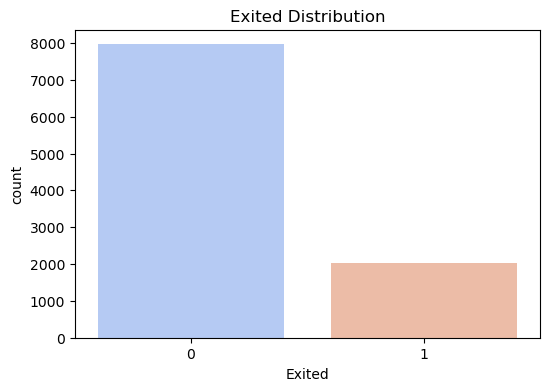

In [243]:
plt.figure(figsize=(6, 4))
sns.countplot(x= "Exited", data=df, palette='coolwarm')
plt.title("Exited Distribution")
plt.show()

# Feature Correlation Heatmap

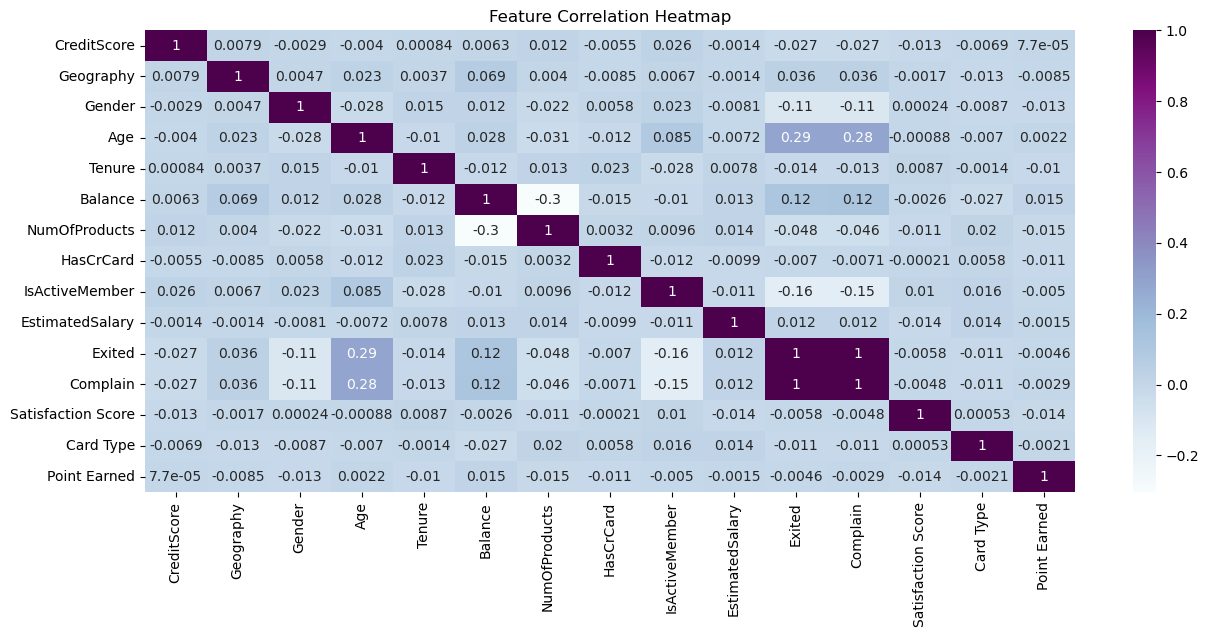

In [245]:
plt.figure(figsize=(15, 6))
sns.heatmap(df.corr(), annot=True, cmap='BuPu')
plt.title("Feature Correlation Heatmap")
plt.show()

# Features Correlation with target

In [247]:
correlation_matrix = df.corr()
correlated_features = correlation_matrix["Exited"].sort_values(ascending=False)
print("Feature Correlation with Target:\n", correlated_features)

Feature Correlation with Target:
 Exited                1.000000
Complain              0.995693
Age                   0.285296
Balance               0.118577
Geography             0.035712
EstimatedSalary       0.012490
Point Earned         -0.004628
Satisfaction Score   -0.005849
HasCrCard            -0.006976
Card Type            -0.010861
Tenure               -0.013656
CreditScore          -0.026771
NumOfProducts        -0.047611
Gender               -0.106267
IsActiveMember       -0.156356
Name: Exited, dtype: float64


# Boxplot to detect Outliers

/var/folders/d0/w4shwsw57d3_tw35g_ct9jt80000gn/T/ipykernel_6547/3613817996.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Exited', y='Complain', data=df, palette='coolwarm')


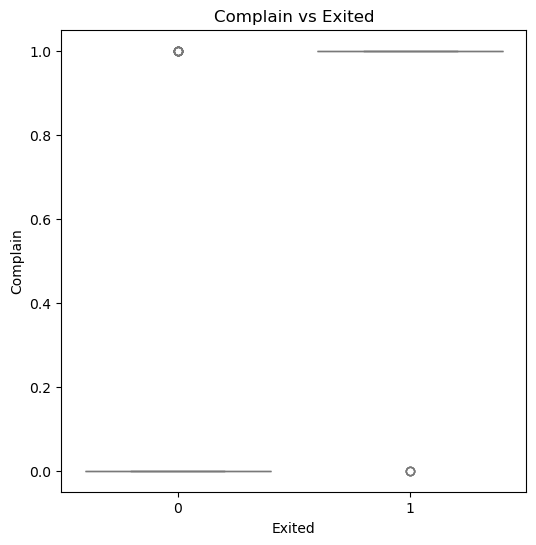

In [303]:
plt.figure(figsize=(6, 6))
sns.boxplot(x='Exited', y='Complain', data=df, palette='coolwarm')
plt.title("Complain vs Exited")
plt.show()

# Model Selection of Machine Learning

In [251]:
X = df.drop(columns=["Exited"])
y = df["Exited"]

In [252]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned
0,619,0,0,42,2,0.00,1,1,1,101348.88,1,2,0,464
1,608,2,0,41,1,83807.86,1,0,1,112542.58,1,3,0,456
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1,3,0,377
3,699,0,0,39,1,0.00,2,0,0,93826.63,0,5,1,350
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0,5,1,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0,1,0,300
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0,5,2,771
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1,3,3,564
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1,2,1,339


In [253]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

# Split Data into Training and Testing Sets


In [255]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Feature Sacaling 

In [257]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [258]:
X_train

array([[ 0.35649971, -0.9055496 ,  0.91324755, ..., -0.72001005,
        -1.34072928, -0.43019311],
       [-0.20389777,  0.30164867,  0.91324755, ...,  0.70434217,
         0.45064178,  1.56590792],
       [-0.96147213,  1.50884694,  0.91324755, ...,  0.70434217,
         1.34632732, -1.24374877],
       ...,
       [ 0.86500853, -0.9055496 , -1.09499335, ...,  1.41651828,
         1.34632732,  0.31667765],
       [ 0.15932282, -0.9055496 ,  0.91324755, ..., -0.00783394,
        -1.34072928,  0.32556897],
       [ 0.47065475,  0.30164867,  0.91324755, ...,  0.70434217,
        -1.34072928,  0.14329694]])

In [259]:
X_test

array([[-0.57749609,  0.30164867,  0.91324755, ..., -1.43218616,
        -0.44504375,  0.45449309],
       [-0.29729735, -0.9055496 ,  0.91324755, ..., -0.72001005,
         1.34632732, -0.43908443],
       [-0.52560743,  1.50884694, -1.09499335, ..., -1.43218616,
        -0.44504375, -1.4482491 ],
       ...,
       [ 0.81311987, -0.9055496 , -1.09499335, ..., -0.72001005,
         0.45064178, -0.45686707],
       [ 0.41876609, -0.9055496 ,  0.91324755, ..., -0.00783394,
         0.45064178,  0.35224292],
       [-0.24540869,  0.30164867,  0.91324755, ...,  0.70434217,
         1.34632732,  1.24582045]])

# Random forest 

In [261]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Make Predictions

In [263]:
y_pred = rf_model.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 1, 1])

In [264]:
y_test

6252    0
4684    0
1731    0
4742    0
4521    0
       ..
6412    1
8285    0
7853    1
1095    1
6929    1
Name: Exited, Length: 2000, dtype: int64

# Model Evaluation 

In [266]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.999
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1607
           1       1.00      1.00      1.00       393

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



# Plot Confusion Matrix 

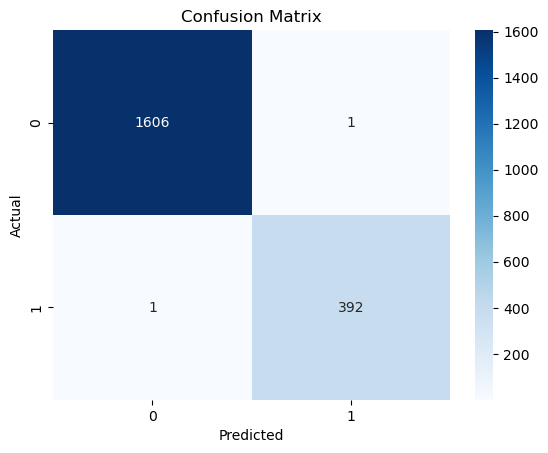

In [268]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Plot ROC Curve 

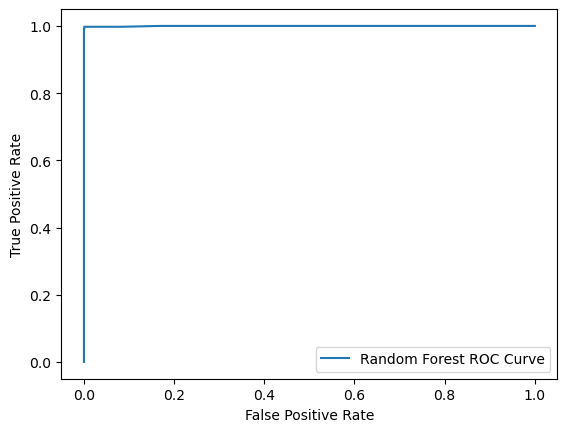

In [270]:
y_probs = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr, label="Random Forest ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

## Plot ROC Curve Insights

- In this plot we are able to see how the curve basically touch the top-left corner of the plot, which means that the model is working properly when it is about distinguishing between the two classes ( high true positive rate and a very low false positive rate)

- The before mentioned When a curve looks like this, the AUC score is practically 1, which usually means the model is performing extremely well. That said, it's worth double-checking things like whether the dataset is balanced and not too small or being carefull that is not overfitting.
 

# Evaluating others models 


Random Forest Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1607
           1       1.00      1.00      1.00       393

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Accuracy: 0.999


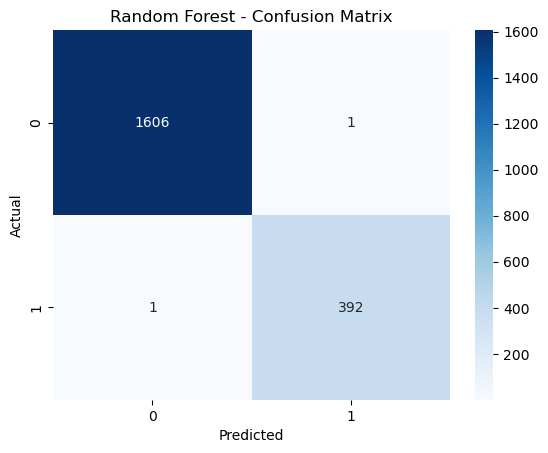


Logistic Regression Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1607
           1       1.00      1.00      1.00       393

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Accuracy: 0.999


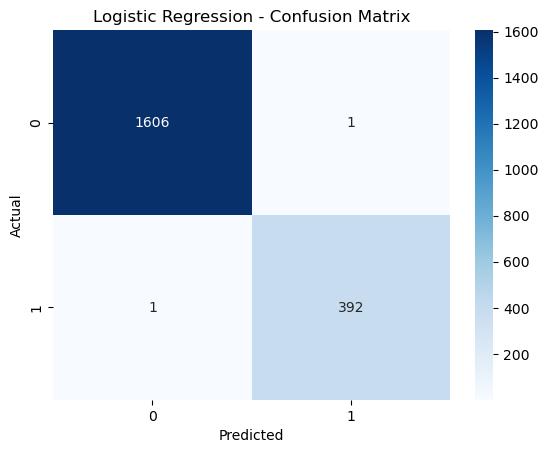


Support Vector Machine Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1607
           1       1.00      1.00      1.00       393

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Accuracy: 0.999


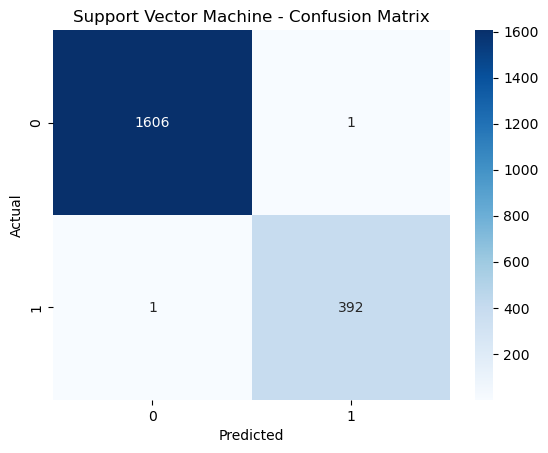

In [273]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine": SVC(probability=True)  # probability=True allows for predicting probabilities
}

for name, model in models.items():
    model.fit(X_train, y_train)  # Train model
    y_pred = model.predict(X_test)  # Make predictions

    # Print performance metrics
    print(f"\n{name} Performance:")
    print(classification_report(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))

    # Display Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# SHAP: Use TreeExplainer for tree-based models, ensure CPU-only

In [289]:
explainer = shap.TreeExplainer(rf_model, feature_perturbation = "tree_path_dependent")

# Compute SHAP values

In [292]:
shap_values = explainer.shap_values(X_test)

# Plot SHAP summary for class 1 (churned customers)

<Figure size 640x480 with 0 Axes>

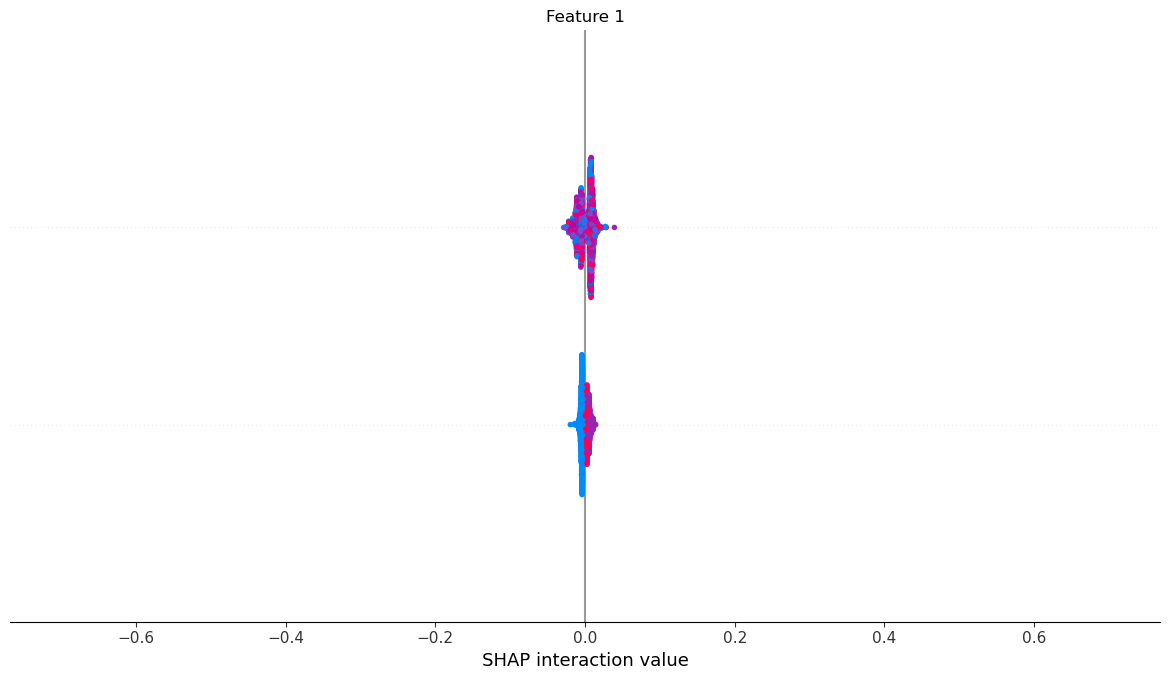

In [294]:
shap.summary_plot(shap_values, X_test)

# SHAP - Global Feature Importance

In [281]:
import numpy as np
# Ensure SHAP values match the shape of X_test
shap_matrix = np.array(shap_values[1])

# Fix if shape is flipped
if shap_matrix.shape[1] != X_test.shape[1]:
    shap_matrix = shap_matrix.T

shap_df = pd.DataFrame(shap_matrix, columns=X.columns)

# Compute mean absolute SHAP values per feature and sort them
mean_shap = np.abs(shap_df).mean().sort_values(ascending=False)

print(mean_shap)

Complain              0.639233
IsActiveMember        0.033221
EstimatedSalary       0.031026
NumOfProducts         0.028357
Age                   0.025430
Balance               0.017758
CreditScore           0.013577
Geography             0.011137
Gender                0.008274
Satisfaction Score    0.008123
Card Type             0.004534
HasCrCard             0.001722
Tenure                0.001308
Point Earned          0.000737
dtype: float64


# LIME - Local Instance Explanation

In [283]:
# Create a LIME explainer
explainer_lime = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X.columns,
    class_names=["Not Churned", "Churned"],
    mode="classification"
)

# Select a specific test sample
customer_sample = X.iloc[10]

# Generate LIME explanation
exp = explainer_lime.explain_instance(
    data_row=customer_sample,
    predict_fn=rf_model.predict_proba
)

# Show the explanation
exp.show_in_notebook()

/opt/anaconda3/lib/python3.12/site-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/opt/anaconda3/lib/python3.12/site-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/opt/anaconda3/lib/python3.12/site-packages/lime/lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by positio

# Feature Importance and Business Insights

which features most influence churn (Exited)?

Once that we observate our Feature Correlation HeatMap and our Features Correlation with target, in this case "Exited", we are able to recognise that our main features with most influence in churn, are "Complain" with a 0.995693 of relation and "Age" with a 0.285296.


#  
1. Why are customers leaving?
2. What can the company do to retain them?
3. Any surprising findings from the data?

The correlation heatmap shows that customers are more likely to leave if they are older or if they have made complaints. These two variables seem to matter the most. Also, people who are less active with the company and some women seem slightly more likely to leave as well.

To keep customers, the company should focus on listening to complaints and solving them in the fastest way. Making older customers feel more valued and improving communication could help a lot. Keeping people more involved, like with with offers, rewards, or regular check-ins, could also reduce the chance they leave.

One surprising thing is that things like salary, credit score, or even satisfaction score don’t really affect whether someone stays or goes. This shows that how customers feel and are treated matters more than just their money or profile. It is to say, focusing on service and care is the key to keeping them happy.

This model could be used inside a Customer Relationship Management (CRM) system to warn staff when someone might leave, so the company can act early to keep them.